# 📻 Gradient Descent - Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
n = len(df.index)

def predict(x1,x2,x3,w1,w2,w3,b):
    return w1*x1 + w2*x2 + w3*x3 + b

def gradient(y_hat,y,x1,x2,x3):
    dw1 = 2/n*x1*(y_hat-y)
    dw2 = 2/n*x2*(y_hat-y)
    dw3 = 2/n*x3*(y_hat-y)
    db =  2/n*  (y_hat-y)
    return (dw1,dw2,dw3,db)

def update(w1,w2,w3,b,dw1,dw2,dw3,db,lr):
    w1_n = w1 - lr*dw1
    w2_n = w2 - lr*dw2
    w3_n = w3 - lr*dw3
    b_n = b - lr*db
    return (w1_n,w2_n,w3_n,b_n)

In [7]:
# Intial
b=0
w1,w2,w3 = 0, 0, 0
lr= 1e-3
max_epoch = 3000
avg_loss = []
for i in range(max_epoch):
    losses = []
    for i in range(n):
        x1,x2,x3,y = df.iloc[i,0],  df.iloc[i,1],  df.iloc[i,2],   df.iloc[i,3]

        y_hat = predict(x1,x2,x3,w1,w2,w3,b)

        loss = 1/n *(y_hat-y)**2
        losses.append(loss)

        (dw1,dw2,dw3,db) = gradient(y_hat,y,x1,x2,x3)

        (w1,w2,w3,b)    =  update(w1,w2,w3,b,dw1,dw2,dw3,db,lr)

    avg_loss.append(np.mean(losses))

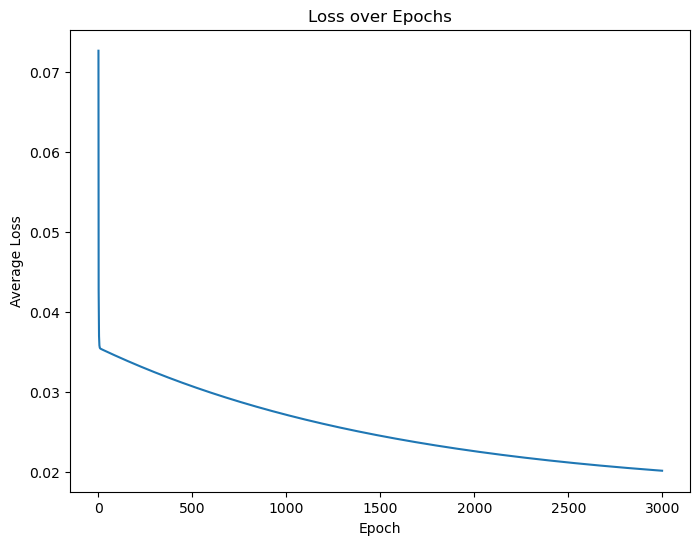

In [8]:
plt.figure(figsize=(8,6))
plt.plot(range(max_epoch),avg_loss)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Loss over Epochs')
plt.show()

In [9]:
print(w1,w2,w3, b)

0.061341197724141816 0.13022971381213339 0.004514956334673139 2.82830127821167


In [10]:
x1_real,x2_real,x3_real = 57.5,32.8,23.5
predicted_sale = predict(x1_real,x2_real,x3_real,w1,w2,w3,b)
print('predicted_sale: ', predicted_sale) # reality: 11.8

predicted_sale:  10.733056234252619


In [11]:
predict_sales = [predict(df.iloc[i,0],df.iloc[i,1],df.iloc[i,2],w1,w2,w3,b) for i in range(n)]

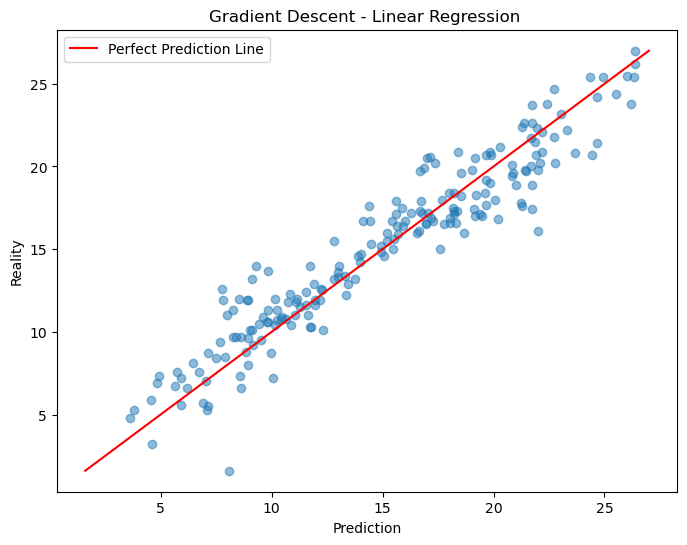

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(predict_sales,df['Sales'],alpha=0.5)
plt.plot([min(df['Sales']),max(df['Sales'])],[min(df['Sales']),max(df['Sales'])],label= "Perfect Prediction Line",color = 'red')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.title('Gradient Descent - Linear Regression ')
plt.legend()
plt.show()